In [1]:
from google.colab import drive 

In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
drive._mount("/content/drive/")

Mounted at /content/drive/


In [4]:
project_name = "/content/drive/MyDrive/forestfires.csv"

# **Importation et organisation de la base **

In [5]:
df=pd.read_csv(project_name)

In [ ]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [ ]:
months = {"jan" : 1, "feb" : 2, "mar" : 3, "apr" : 4, "may" : 5, "jun" : 6, "jul" : 7, "aug" : 8, "sep" : 9, "oct" : 10, "nov" : 11, "dec" : 12}
days = {"mon" : 1, "tue" : 2, "thu" : 4, "wed" : 3, "fri" : 5, "sat" : 6, "sun" : 7}


In [ ]:
for i in range(len(df)):
  df.loc[i,"month"] = months[df.loc[i,"month"]]
  df.loc[i,"day"] = days[df.loc[i,"day"]]

In [ ]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


# **Matrice de corrélation**

In [ ]:
numerical_fea = df.describe(include=['float', 'int']).columns


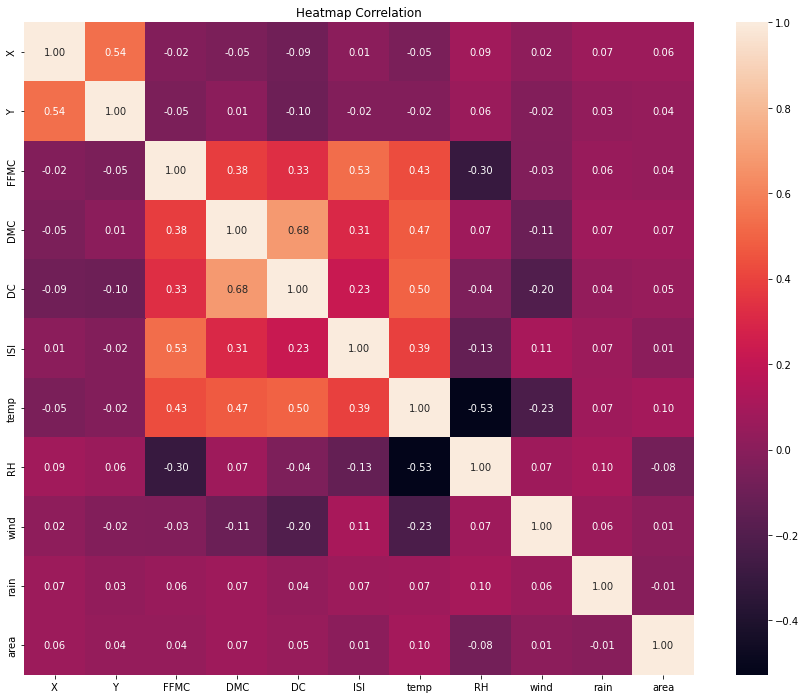

In [ ]:
plt.figure(figsize=(15, 12))

plt.title("Heatmap Correlation")

sns.heatmap(df[numerical_fea].corr(), annot=True, fmt='.2f');

# **Découpage en train et test**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(["area"],axis=1)
Y = df["area"]



In [ ]:
train_set , test_set = train_test_split(df,test_size=0.2,random_state=1)

In [ ]:
X = df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]].values
Y = df.iloc[:, [12]].values

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [ ]:
x_train = np.array(X_train)
y_train = np.array(Y_train)
x_test = np.array(X_test)
y_test = np.array(Y_test)

# **Régression des moindres carrés**

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)


In [ ]:
pred = reg.predict(x_test)


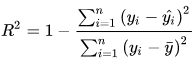

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.011623757451894146

# **Le model est mauvais**

# **Fonction cout**

In [ ]:

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test,pred)

In [ ]:
mse

5760.708374894815

# **2)a)Modéle :**

In [ ]:
from random import random

In [ ]:
teta = []
b = [random()*2 -1] # b est teta 0

In [ ]:
def init():
  for i in range(12):
    teta.append(random()*2 -1)


In [ ]:
init()

In [ ]:
b

[-0.9796955053305834]

In [ ]:
#calcul de h
def h(t, x):
  result = 0
  for i in range(len(t)):
    result += t[i]*x[i]
  return result + b[0]

In [ ]:
#calcul de J (coût)
def cost(x, y, t):
  result = 0
  for i in range(x.shape[0]):
    result += (h(teta, x[i]) - y[i,0])**2
  return result / (2 * x.shape[0])

In [ ]:
#calcul de dérivé partiel de J%teta_j
def delta(x, y, j):
  result = 0
  for i in range(x.shape[0]):
    result += x[i,j]*(h(teta, x[i]) - y[i,0])
  return result / x.shape[0]

In [ ]:
#calcul de dérivé partiel de J%teta_0
def delta_b(x, y):
  result = 0
  for i in range(x.shape[0]):
    result += h(teta, x[i]) - y[i,0]
  return result / x.shape[0]

In [ ]:
#l'algorithme qui converge les teta vers leurs valeurs optimal
#recherche des valeurs optimals de teta par itération
def gradient_descent(x, y, lr):
  for j in range(12):
    res = delta(x, y, j)
    teta[j] -= lr * res
  b[0] -= lr * delta_b(x, y)

# **Application de l'algorithme :**

In [ ]:
costs = []

In [ ]:
for i in range(2000):
  gradient_descent(x_train, y_train, 0.0000001)
  costs.append(cost(x_train, y_train, teta))

KeyboardInterrupt: ignored

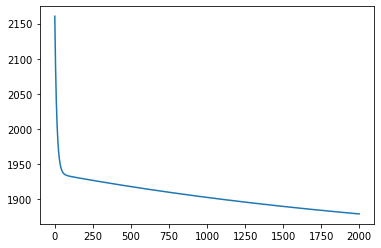

In [ ]:
plt.plot(costs)


In [ ]:
var_costs = []
lr_list = [ 10**(i * (-1)) for i in range(10)]

In [ ]:
lr_list

In [ ]:
#choix du learning rate optimal
for j in lr_list:
  teta=[]
  b = [random()*2 -1]
  init()
  for i in range(1000):
    gradient_descent(x_train, y_train, j)
  var_costs.append(cost(x_train, y_train, teta))

In [ ]:
var_costs

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1918.7743231296654,
 2123.2051268279793,
 2252.7458748072017,
 10049.393421399169]

# **La meilleure valeur de Lr est 1e-07 qui correspond à 1871.4647336078483,**



# ***e.Prédiction***

In [ ]:
pred_train = []
for i in x_train:
  res = h(teta, i)
  pred_train.append(res)

In [ ]:
mse_train = mean_squared_error(y_train,pred_train)
mse_train

In [ ]:
r2_train = r2_score(y_train, pred_train)
r2_train

# **le model est plus pire que la prediction de la valeur moyenne**

In [ ]:
pred_test = []
for i in x_test:
  res = h(teta, i)
  pred_test.append(res)

In [ ]:
mse_test = mean_squared_error(y_test,pred_test)
mse_test

In [ ]:
r2_test = r2_score(y_test, pred_test)
r2_test

# ***La performance de l'algorithme prédéfini du python est plus performant que l'algorithme fait manuellement car le learning rate n'est pas optimal . ***

# **Ridge**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
clf = Ridge(alpha=1.0)

In [ ]:
clf.fit(x_train, y_train)

In [ ]:
clf.get_params()

In [ ]:
pred=clf.predict(x_train)

In [ ]:
clf.score(x_test, y_test, sample_weight=None)

# **b)**

In [ ]:
mse=[]
for i in range(100,1000,50):
 clf = Ridge(alpha=i) 
 clf.fit(x_train, y_train)
 pred=clf.predict(x_test)
 clf.score(x_test, y_test, sample_weight=None)
 _mse= mean_squared_error(y_test,pred)
 mse.append(_mse)
 




In [ ]:
mse

# ***la meilleur valeur de lambda est 500 qui correspont à un mean square error = 5714.207785999409***

In [ ]:
mse=[]
for i in range(100,1000,20):
 clf = Ridge(alpha=i) 
 clf.fit(x_train, y_train)
 pred=clf.predict(x_test)
 clf.score(x_test, y_test, sample_weight=None)
 _mse= mean_squared_error(y_test,pred)
 mse.append(_mse)

In [ ]:
plt.plot(mse)